In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df=pd.read_csv(r"FuelConsumption.csv")
df[1:50]

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212
10,2014,ACURA,TSX,COMPACT,2.4,4,M6,Z,11.2,8.1,9.8,29,225


In [3]:
mask=np.random.rand(len(df))<0.8
train=df[mask]
test=df[~mask]


In [17]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
regres=linear_model.LinearRegression()

trainx=np.asanyarray(train[["ENGINESIZE"]])
trainy=np.asanyarray(train[["CO2EMISSIONS"]])

testx=np.asanyarray(test[["ENGINESIZE"]])
testy=np.asanyarray(test[["CO2EMISSIONS"]])

poly=PolynomialFeatures(degree=2)
poly_trainx=poly.fit_transform(trainx)

regres.fit(poly_trainx,trainy)

print("Coeficients:",regres.coef_)
print("intercept:",regres.intercept_)

Coeficients: [[ 0.         50.31558108 -1.52637609]]
intercept: [107.55172471]


In [31]:
from sklearn.metrics import r2_score
poly_testx=poly.transform(testx)

predy=regres.predict(poly_testx)

print("RAM:",np.mean(np.absolute(testy-predy)))
print("R2_Score:",r2_score(testy,predy))

RAM: 23.308715782033286
R2_Score: 0.7703257774390229


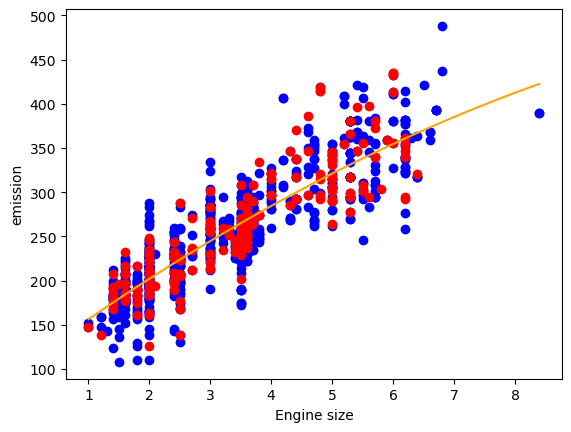

In [32]:
x_vals=np.linspace(df["ENGINESIZE"].min(),df["ENGINESIZE"].max(),len(df["ENGINESIZE"]))

plt.scatter(trainx,trainy,color="blue")
plt.scatter(testx,testy,color="red")
plt.plot(x_vals,(regres.intercept_[0]+regres.coef_[0][1]*np.power(x_vals,1)+regres.coef_[0][2]*np.power(x_vals,2)),color="orange")
plt.xlabel("Engine size")
plt.ylabel("emission")
plt.show()